In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_sas('poverty.sas7bdat')

In [4]:
df.tail()

,Birth,Death,InfantDeath,Country
92,52.2,15.6,103.0,b'Uganda'
93,50.5,14.0,106.0,b'Tanzania'
94,45.6,14.2,83.0,b'Zaire'
95,51.1,13.7,80.0,b'Zambia'
96,41.7,10.3,66.0,b'Zimbabwe'


Index(['Birth', 'Death', 'InfantDeath'], dtype='object')

In [10]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [12]:
var = list(df.describe().columns)

In [13]:
var

['Birth', 'Death', 'InfantDeath']

In [15]:
X = df[var].copy()

In [16]:
sc = StandardScaler()
sc.fit(X)
Xs = pd.DataFrame(sc.transform(X),columns=var)

In [19]:
pca = PCA()
pca.fit(Xs)
print(pca.explained_variance_ratio_.cumsum())
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2','p3'])

[0.781544   0.96200154 1.        ]


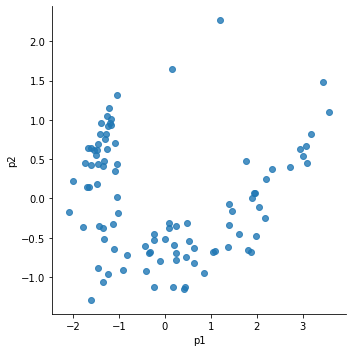

In [20]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

In [21]:
sc = MinMaxScaler()
sc.fit(X)
Xm = pd.DataFrame(sc.transform(X),columns=var)
lst = []
for k in range(2,10):
    cl = KMeans(n_clusters=k)
    cl.fit(Xm)
    lst.append(cl.inertia_)

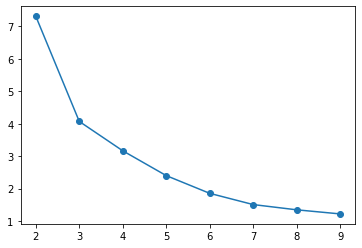

In [23]:
plt.plot(range(2,10),lst,marker='o')

In [32]:
cl = KMeans(n_clusters=5)

In [33]:
cl.fit(Xm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
df['cl'] = X['cl'] = Xs['cl'] = Xm['cl'] = Xp['cl'] = cl.predict(Xm)

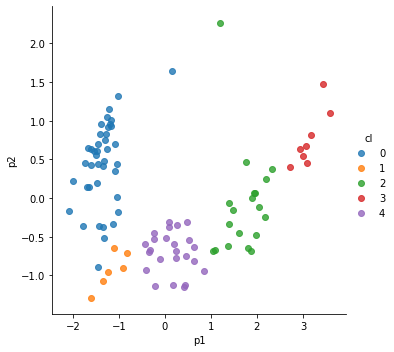

In [35]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False,hue='cl')

In [37]:
X.groupby('cl').mean()

,Birth,Death,InfantDeath
cl,,,
0,15.172500,9.307500,13.200000
1,27.733333,4.633333,24.950000
2,44.736842,14.763158,99.057895
3,46.900000,21.012500,144.450000
4,34.866667,8.433333,67.083333


In [41]:
pd.DataFrame(X.mean()).T

,Birth,Death,InfantDeath,cl
0,29.229897,10.836082,54.901031,1.690722


In [46]:
df.loc[df.cl==2]

,Birth,Death,InfantDeath,Country,cl
12,46.6,18.0,111.0,b'Bolivia',2
22,29.0,23.2,43.0,b'Mexico',2
44,42.5,11.5,108.1,b'Iran',2
54,42.2,15.5,119.0,b'Bangladesh',2
55,41.4,16.6,130.0,b'Cambodia',2
63,39.6,14.8,128.0,b'Nepal',2
72,48.5,11.6,67.0,b'Botswana',2
73,46.1,14.6,73.0,b'Congo',2
76,39.4,16.8,103.0,b'Gabon',2
78,44.4,13.1,90.0,b'Ghana',2
